In [1]:
from pathlib import Path
import pandas as pd 
import xml.etree.ElementTree as et 
%matplotlib inline

root_dir_sr = Path("/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/")
root_dir_xml = Path("/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDxml/")

scene_paths = sorted(root_dir_sr.glob("*"))
xml_paths = sorted(root_dir_xml.glob("*"))
df_cols = ["cloud_cover", "cloud_shadow", "snow_ice", "fill", "instrument", "level1_collection", "ard_version"]
rows = []


for xml_path in xml_paths:
    
    xtree = et.parse(xml_path)
    tile_meta_ard = list(xtree.getroot())[0][0]
    tile_meta_global = list(xtree.getroot())[1][1]
    dataframe_dict = {}

    element = tile_meta_ard.find("{https://landsat.usgs.gov/ard/v1}"+"tile_grid")
    h = element.attrib['h']
    v = element.attrib['v']
    
    element = tile_meta_global.find("{https://landsat.usgs.gov/ard/v1}"+"wrs")
    path = element.attrib['path']
    row = element.attrib['row']
    
    element = tile_meta_ard.find("{https://landsat.usgs.gov/ard/v1}"+"acquisition_date")
    datetime = pd.to_datetime(element.text, format="%Y-%m-%d")
    
    dataframe_dict.update({'h':h, 'v':v, 'path': int(path), 'row': int(row), 'acquisition_date':datetime})
    
    for col in df_cols:
        element = tile_meta_ard.find("{https://landsat.usgs.gov/ard/v1}"+col)
        if col in ["cloud_cover", "cloud_shadow", "snow_ice", "fill"]:
            element.text = float(element.text)
        dataframe_dict.update({col:element.text})
    rows.append(dataframe_dict)
    
out_df = pd.DataFrame(rows, columns = df_cols.extend(['h','v', 'path', 'row', 'acquisition_date']))

out_df = out_df.set_index("acquisition_date")

out_df['xml_paths'] = xml_paths
out_df['scene_paths'] = scene_paths

# original paths and rows used in (path, row) form
og_path_rows = [(29, 31), (29, 32), (30, 31), (30, 32), (31, 31), (31, 32), (32, 31), (32, 32), (33, 31), (33, 32)]
# below not used yet, unsure which dates correspond to which path rows since this isn't documented in the label metadata
og_dates = pd.to_datetime(["2005/06/20", '2005/07/22', '2005/09/08', '2005/06/27', '2005/08/30', '2005/09/15', '2005/08/05', '2005/09/06', '2005/07/11', '2005/08/28', '2005/07/02', '2005/08/19', '2005/09/20'])
# 2005-07-20 was missing, could be a mistake in the metadata, amybe they meant 2005-07-22

out_df = out_df.loc[og_dates]

out_df = out_df[out_df[['path', 'row']].apply(tuple, axis=1).isin(og_path_rows)]
out_df

,h,v,path,row,cloud_cover,cloud_shadow,snow_ice,fill,instrument,level1_collection,ard_version,xml_paths,scene_paths
acquisition_date,,,,,,,,,,,,,
2005-06-20,015,008,29,31,0.7433,0.0962,0.0030,49.2312,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20,015,009,29,32,0.3617,0.0153,0.0018,23.0621,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20,016,008,29,31,0.1065,0.0272,0.0000,20.1136,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20,016,009,29,32,0.0180,0.0025,0.0000,46.4412,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-22,015,008,29,31,0.4730,0.0090,0.0016,48.1110,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-22,015,009,29,32,1.2552,0.7000,0.0007,21.9231,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-22,016,008,29,31,1.1735,0.6463,0.0000,22.0789,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-08,015,008,29,31,0.4539,0.0027,0.0024,46.0910,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-08,015,009,29,32,0.3829,0.0468,0.0016,19.8760,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...


In [2]:
# drops the cloudiest duplicate by keeping the first duplicate. since we sorted by least cloudy to cloudiest
least_cloudy_june_sept_df = out_df['2005-06-20':"2005-09-20"]\
    .sort_values(["fill", "cloud_cover"])\
    .drop_duplicates(['h','v']) 

least_cloudy_june_sept_lst = least_cloudy_june_sept_df['scene_paths'].apply(str).to_list()

In [ ]:
from cropmask.preprocess import PreprocessWorkflow, setup_dirs
import time
import dask

param_path = "/home/ryan/work/CropMask_RCNN/cropmask/test_preprocess_config.yaml"

# selected scenes with almost no clouds that occurred as well outside of the frost season as possible (ends in February-March)
scene_list = least_cloudy_june_sept_lst
labels_path = "/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson"

setup_dirs(param_path)

results = []
for scene_path in scene_list:

#     wflow = dask.delayed(PreprocessWorkflow)(param_path, scene_path, labels_path)

    wflow = PreprocessWorkflow(param_path, scene_path, labels_path)
    
    band_list = wflow.yaml_to_band_index()
        
    product_list = wflow.get_product_paths(band_list)
        
    a = wflow.load_meta_and_bounds(product_list)
        
    b = a.stack_and_save_bands()
        
    c = b.tile_scene_and_vector()
    
    result = c.geojsons_to_masks() #not needed for coco conversions tep if using solaris

    results.append(result)
  

# # # https://docs.dask.org/en/stable/delayed-best-practices.html
# from dask.distributed import Client

# client = Client()  # use dask.distributed by default

# x = client.compute(results, scheduler="processes", num_workers=3)  # start computation in the background

In [ ]:
x

# Single Case

In [3]:
least_cloudy_june_sept_lst

['/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_013008_20050828_20190107_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_014008_20050805_20181227_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_012008_20050920_20190107_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_015008_20050915_20190102_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_013009_20050711_20190102_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_015009_20050908_20190102_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_016008_20050620_20190102_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_014009_20050906_20190102_C01_V01_SR',
 '/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/LT05_CU_016009_20050620_20190102_C01_V01_SR']

In [3]:
%load_ext autoreload
%autoreload 2
from cropmask.preprocess import PreprocessWorkflow, setup_dirs
import time
import dask

param_path = "/home/ryan/work/CropMask_RCNN/cropmask/test_preprocess_config.yaml"

# selected scenes with almost no clouds that occurred as well outside of the frost season as possible (ends in February-March)
# scene_list = least_cloudy_june_sept_lst
labels_path = "/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson"

setup_dirs(param_path)
# problem path
wflow = PreprocessWorkflow(param_path, 
                             least_cloudy_june_sept_lst[2],
                             labels_path)

band_list = wflow.yaml_to_band_index()

product_list = wflow.get_product_paths(band_list)

a = wflow.load_meta_and_bounds(product_list)

b = a.stack_and_save_bands()



/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/pyt

In [4]:
b.tile_scene_and_vector()

/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Initializing Tiler...
Tiler initialized.
dest_dir: /datadrive/test-ard-june-sept-rgb/tiles/image_tiles
dest_crs will be inferred from source data.
src_tile_size: (512, 512)
tile size units metric: False
Resampling is set to None


0it [00:00, ?it/s]The following warnings were found:
- The file is greater than 512xH or 512xW, it is recommended to include internal overviews

The following errors were found:
- The file is greater than 512xH or 512xW, but is not tiled
2it [00:00, 13.34it/s]

Beginning tiling...
nodata value threshold supplied, filtering based on this percentage.
Checking input data...
COG: False
[1, 2, 3]
Source CRS: EPSG:None
Destination CRS: EPSG:None
Inputs OK.


24it [00:01, 15.66it/s]
0it [00:00, ?it/s]

Tiling complete. Cleaning up...
Done. CRS returned for vector tiling.
Preparing the tiler...
Initialization done.
Num tiles: 24


24it [00:07,  3.10it/s]


In [7]:
b.vector_tiler.dest_crs

CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

to do make issue. _check_crs messes up first proj turns it into second proj

In [6]:
b.vector_tiler.src_crs

CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [10]:
b.vector_tiler.dest_crs

CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_IAU_1976_ellipsoid",SPHEROID["IAU 1976",6378140,298.257]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [5]:
b.geojsons_to_masks()

  8%|▊         | 2/24 [00:00<00:01, 15.41it/s]

starting label mask generation


100%|██████████| 24/24 [00:01<00:00, 12.46it/s]


Fill values set to [ 828.91725666 1169.46176693 1423.37931677]


In [7]:
import rasterio as rio
import xarray
import rioxarray

In [8]:
src = rio.open("/datadrive/test-ard-june-sept-rgb/tiles/image_tiles/"+"LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.tif")

RasterioIOError: /datadrive/test-ard-june-sept-rgb/tiles/image_tiles/LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.tif: No such file or directory

In [13]:
src.crs

CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_IAU_1976_ellipsoid",SPHEROID["IAU 1976",6378140,298.257]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [6]:
import geopandas
ex = geopandas.read_file("/datadrive/test-ard-june-sept-rgb/tiles/geojson_tiles/"+"LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.geojson")

In [7]:
ex

,ID,AREA,PERIMETER,ACRES,HECTARES,origarea,origlen,partialDec,truncated,geometry
0,44301,5105550.000,8035.119,117.207,47.432,474624.120677,0,1.000000,0,"POLYGON ((-620375.959 2034824.144, -620363.766..."
1,44300,5118750.000,8043.075,117.510,47.555,475851.189130,0,1.000000,0,"POLYGON ((-621240.295 2034856.853, -621228.343..."
2,45160,1715594.269,5239.670,39.385,15.938,159485.390130,0,1.000000,0,"POLYGON ((-624087.745 2034763.654, -623632.499..."
3,44299,2731444.176,5860.412,62.705,25.376,253921.617559,0,1.000000,0,"POLYGON ((-624032.073 2035474.336, -624008.518..."
4,51963,5860942.890,8583.709,134.549,54.450,544848.117039,0,1.000000,0,"POLYGON ((-616691.458 2035691.937, -616663.007..."
5,44296,4626650.000,7647.751,106.213,42.983,430105.168352,0,1.000000,0,"POLYGON ((-620286.054 2035574.366, -620290.414..."
6,49398,5790062.868,8531.647,132.922,53.792,538259.589069,0,1.000000,0,"POLYGON ((-615843.451 2036199.443, -615815.172..."
7,44290,5337200.000,8211.570,122.525,49.584,496160.516553,0,1.000000,0,"POLYGON ((-621915.334 2036555.740, -621922.323..."
8,44298,4260002.347,7318.316,97.796,39.577,396020.001020,0,0.999282,1,"POLYGON ((-624735.727 2035532.879, -624709.454..."


In [8]:
ex.crs

{'init': 'epsg:4326'}

/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


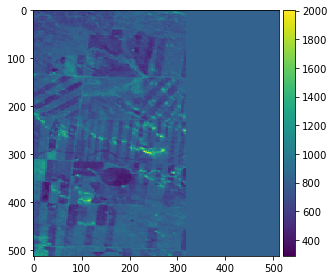

In [16]:
skio.imshow(src.read()[0])

In [21]:
src.read().shape

(9, 512, 512)

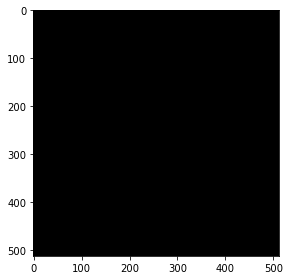

In [15]:
skio.imshow(src.read()[0])

In [14]:
src = rio.open("/datadrive/test-ard-june-sept-rgb/tiles/label_tiles/"+"LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.tif")

In [12]:
src = rio.open("/datadrive/test-ard-june-sept-rgb/tiles/label_tiles/"+"LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.tif")

In [14]:
import skimage.io as skio

In [11]:
xarr = rioxarray.open_rasterio("/datadrive/test-ard-june-sept-rgb/tiles/image_tiles/"+"LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.tif")

In [20]:
xarr.rio.

AttributeError: 'RasterArray' object has no attribute 'mask'

In [9]:
src.close()

In [9]:
import rasterio as rio
src = rio.open(b.scene_path)

In [10]:
import us
from cropmask import io_utils
import xarray
import rioxarray
nebraska_url = us.states.NE.shapefile_urls('state')
gdf = io_utils.zipped_shp_url_to_gdf (nebraska_url)
crs=xarray.open_rasterio(wflow.scene_path).rio.crs
bounds_poly = gdf.to_crs(crs)['geometry'].iloc[0]

/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [13]:
from shapely.geometry import box
mask_geometry = bounds_poly.intersection(box(*src.bounds))

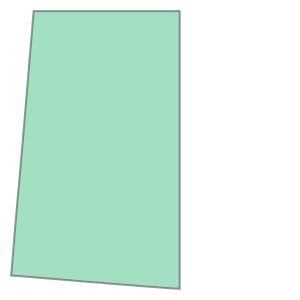

In [14]:
mask_geometry

In [15]:
from rasterio import mask
import numpy as np
index_lst = np.arange(1,src.meta['count']+1)
arr, t = mask.mask(src, [mask_geometry], all_touched=False, invert=False, nodata=src.meta['nodata'], 
                         filled=True, crop=True, pad=False, pad_width=0.5, indexes=list(index_lst))

NameError: name 'np' is not defined

[2, 2, 2]

In [149]:
arr_nan = np.where(arr!=src.nodata, arr, np.nan)
np.nanmean(arr_nan, axis=tuple(range(1, arr_nan.ndim)))

array([ 748.05943979, 1081.578283  , 1317.93992231])

In [138]:
(src.read()==-9999.0).sum()

2306997

In [133]:
(arr==-9999).sum()

1500519

In [158]:
fill_values = [-10000, -20000, -30000]
for i in np.arange(arr.shape[0]):
    arr[i,...][arr[i,...] == src.nodata] = fill_values[i]

In [163]:
arr[1]

array([[-20000, -20000, -20000, ...,   1006,   1049,   1049],
       [-20000, -20000, -20000, ...,   1005,   1135,   1049],
       [-20000, -20000, -20000, ...,    961,   1091,   1091],
       ...,
       [-20000, -20000, -20000, ...,   1213,   1002,   1213],
       [-20000, -20000, -20000, ...,   1128,   1002,   1087],
       [-20000, -20000, -20000, ..., -20000, -20000, -20000]], dtype=int16)

In [93]:
src.read()

array([[[-9999, -9999, -9999, ...,   615,   701,   550],
        [-9999, -9999, -9999, ...,   636,   699,   657],
        [-9999, -9999, -9999, ...,   634,   720,   720],
        ...,
        [  886,   968,   846, ...,   321,   341,   382],
        [  927,  1009,   907, ...,   382,   382,   424],
        [  968,  1029,  1050, ...,   423,   424,   424]],

       [[-9999, -9999, -9999, ...,  1006,  1049,  1049],
        [-9999, -9999, -9999, ...,  1005,  1135,  1049],
        [-9999, -9999, -9999, ...,   961,  1091,  1091],
        ...,
        [ 1298,  1466,  1256, ...,   561,   561,   646],
        [ 1424,  1466,  1339, ...,   729,   645,   771],
        [ 1508,  1591,  1508, ...,   729,   729,   688]],

       [[-9999, -9999, -9999, ...,  1217,  1287,  1181],
        [-9999, -9999, -9999, ...,  1252,  1357,  1252],
        [-9999, -9999, -9999, ...,  1181,  1357,  1357],
        ...,
        [ 1514,  1650,  1514, ...,   540,   575,   677],
        [ 1616,  1719,  1548, ...,   710,   6

In [94]:
arr

array([[[-9999, -9999, -9999, ...,   615,   701,   550],
        [-9999, -9999, -9999, ...,   636,   699,   657],
        [-9999, -9999, -9999, ...,   634,   720,   720],
        ...,
        [-9999, -9999, -9999, ...,   860,   675,   860],
        [-9999, -9999, -9999, ...,   797,   736,   777],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ...,  1006,  1049,  1049],
        [-9999, -9999, -9999, ...,  1005,  1135,  1049],
        [-9999, -9999, -9999, ...,   961,  1091,  1091],
        ...,
        [-9999, -9999, -9999, ...,  1213,  1002,  1213],
        [-9999, -9999, -9999, ...,  1128,  1002,  1087],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ...,  1217,  1287,  1181],
        [-9999, -9999, -9999, ...,  1252,  1357,  1252],
        [-9999, -9999, -9999, ...,  1181,  1357,  1357],
        ...,
        [-9999, -9999, -9999, ...,  1443,  1203,  1374],
        [-9999, -9999, -9999, ...,  1340,  11

In [ ]:
import geopandas as gpd

_ = gpd.read_file("/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson")

In [ ]:
_[_.is_valid==False]['geometry'].iloc[0].intersection(_[_.is_valid==False]['geometry'].iloc[0]).is_valid

In [ ]:
_[_.is_valid==False]['geometry'] = _[_.is_valid==False].buffer(0)

In [ ]:
_

In [ ]:
all_not_valid.buffer(0).iloc[0]

In [ ]:
all_not_valid.iloc[0]['geometry']

In [ ]:
all_not_valid['geometry'].buffer(0)

In [ ]:
all_not_valid['geometry'].convex_hull.iloc[4].intersection(all_not_valid.iloc[4]['geometry'].buffer(0))

In [ ]:
b.tile_scene_and_vector()

In [ ]:
# import types
# wflow.geojsons_to_masks = types.MethodType(geojsons_to_masks, wflow )

rasterizing 915 512x512 tiles that have anyware from 0 to 100 instances took 18 minutes and 32 seconds

In [ ]:
# import geopandas as gpd
# import solaris as sol
# import os
# from tqdm import tqdm
wflow.geojsons_to_masks()

In [ ]:
import xarray as xa
import rioxarray
label = xa.open_rasterio(sorted(wflow.rasterized_label_paths)[0])

In [ ]:
rast = xa.open_rasterio(sorted(wflow.raster_tile_paths)[0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
rast.where(rast>0).plot.imshow(ax=ax, robust=True)
label.any(axis=0).where(label.any(axis=0)>0).plot.imshow(ax=ax, alpha=.5, add_colorbar=False)
# for i in np.arange(label.shape[0]):
#     label[i].plot.imshow(ax=ax, alpha=.5, add_colorbar=False)

code graveyard, shape preserving tiling but non uniform shapes

In [ ]:
from shapely.geometry import box, Polygon, MultiPolygon, GeometryCollection

def katana(geometry, approx_tile_size, use_projection_size=False, transform=None, recursion_max = 5000, count = 0):
    """Split a Polygon into two parts across it's shortest dimension
    
    Arguments
    ---------
    geometry : str, optional
        A shapely.geometry.Polygon, path to a single feature geojson, 
    or list-like bounding box shaped like [left, bottom, right, top]
    src_tile_size : `tuple` of `int`s, optional
        The size of the input tiles in ``(y, x)`` coordinates. By default,
        this is in pixel units; this can be changed to metric units using the
        `use_metric_size` argument.
    use_metric_size : bool, optional
        Is `src_tile_size` in pixel units (default) or metric? To set to metric
        use ``use_metric_size=True``.
    transform : `tuple` of `int`s, optional
        A rasterio transform.
    
    Adapted from @lossyrob's Gist https://gist.github.com/lossyrob/7b620e6d2193cb55fbd0bffacf27f7f2
    
    
    """
    if isinstance(geometry, str):
        gj = json.loads(open(geometry).read())
        features = gj['features']
        if not len(features) == 1:
            print('Feature collection must only contain one feature')
            sys.exit(1)
        geometry = shape(features[0]['geometry'])
        
    elif isinstance(geometry, list) or isinstance(geometry, np.ndarray):
        assert len(geometry) == 4
        geometry = box(*geometry)
    
    elif isinstance(geometry, (Polygon, MultiPolygon)) is False:
        print("geometry must be one of type list, numpy.ndarray or shapely.geometry.Polygon")
        return
    
    bounds = geometry.bounds
    width = bounds[2] - bounds[0]
    height = bounds[3] - bounds[1]
    if use_projection_size is False:
        if transform is None:
            print("""Error: A transform is needed to convert pixel units to 
                  projection units if use_projection_size is False""")
            return
        approx_tile_size = approx_tile_size * transform[0]
    if max(width, height) <= approx_tile_size or count == recursion_max:
        # either the max dimesnion of the polygon is smaller than the threshold, 
        # or the maximum number of recursions has been reached
        return [geometry]
    if height >= width:
        # split left to right
        a = box(bounds[0], bounds[1], bounds[2], bounds[1]+height/2)
        b = box(bounds[0], bounds[1]+height/2, bounds[2], bounds[3])
    else:
        # split top to bottom
        a = box(bounds[0], bounds[1], bounds[0]+width/2, bounds[3])
        b = box(bounds[0]+width/2, bounds[1], bounds[2], bounds[3])
    result = []
    for d in (a, b,):
        c = geometry.intersection(d)
        if not isinstance(c, GeometryCollection):
            c = [c]
        for e in c:
            if isinstance(e, (Polygon, MultiPolygon)):
                result.extend(katana(e, approx_tile_size, count=count+1, use_projection_size=use_projection_size, transform=transform))
    if count > 0:
        return result
    # convert multipart into singlepart
    final_result = []
    for g in result:
        if isinstance(g, MultiPolygon):
            final_result.extend(g)
        else:
            final_result.append(g)
    return final_result

In [ ]:
shapes = katana(neb, 15360, use_projection_size = True)

gpd.GeoDataFrame(geometry=[neb]).plot()


gpd.GeoDataFrame(geometry=shapes)[400:401].area

In [ ]:
import dask
lst = [1,2,3,4,5,6]
output_lst = []
for i in lst:
    output_lst.append(dask.delayed(sum)([i,1]))
results = dask.compute(*output_lst)

results

In [ ]:
import geopandas as gpd
f = gpd.read_file("/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson")
f.crs

import xarray
import rioxarray
crs = xarray.open_rasterio(list(Path(scene_path).glob("*"))[6]).rio.crs

crs

f.crs = crs

f = f.to_crs(crs)

f.crs